### StarAgile Assignment on Image Classification - Level 2
### Assignment Submitted by VINAY M on 18-09-2023

- Image Classification
- Build an Image classification using ANN on mnist dataset(from Keras package).

In [1]:
import keras
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# MNIST Documentation

In [5]:
# https://keras.io/api/datasets/mnist/

MNIST digits classification dataset
Loads the MNIST dataset.

- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

- Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).
    
    x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

    y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

    x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

    y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
# Applying Normalisation [0-1] Scaling
X_train = np.array(X_train/255.0, dtype = 'float32')
X_test = np.array(X_test/255.0, dtype='float32')

In [11]:
list(np.unique(y_train))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
digitlabels = {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine', 10: 'Ten'}

In [13]:
digitlabels

{0: 'Zero',
 1: 'One',
 2: 'Two',
 3: 'Three',
 4: 'Four',
 5: 'Five',
 6: 'Six',
 7: 'Seven',
 8: 'Eight',
 9: 'Nine',
 10: 'Ten'}

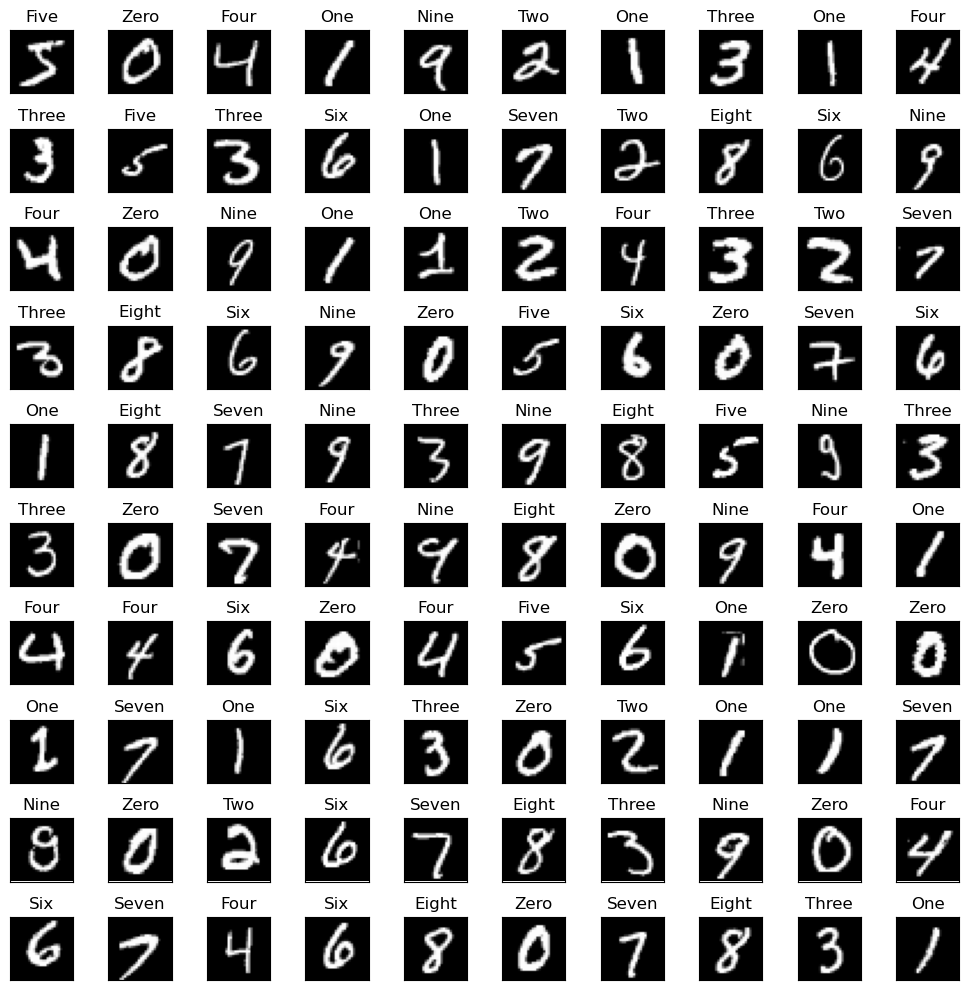

In [14]:
# Displaying some data
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Convert the Pandas Series to a NumPy array and then reshape
    image = X_train[i].reshape((28, 28, 1))

    label_index = int(y_train[i])
    plt.imshow(image, cmap='gray')  # Assuming the data is grayscale

    # Get the class name from the dictionary
    labels = digitlabels[label_index]
    plt.title(labels)
plt.tight_layout()
plt.show()

In [15]:
#CNN Modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()

# Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape
model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(28, 28, 1)))

# MaxPooling2D layer
model.add(MaxPooling2D(pool_size= 2))

# Dropout randomly disable 20% of the neurons which helps to prevent overfitting by reducing co-adaptation between neurons
model.add(Dropout(0.2))

# Flatten the output
model.add(Flatten())

# Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# 10 classes with softmax activation
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1991 - accuracy: 0.9422 - val_loss: 0.0834 - val_accuracy: 0.9741
Epoch 2/30
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0759 - accuracy: 0.9768 - val_loss: 0.0558 - val_accuracy: 0.9818
Epoch 3/30
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.0481 - val_accuracy: 0.9832
Epoch 4/30
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0540 - val_accuracy: 0.9832
Epoch 5/30
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0479 - val_accuracy: 0.9852
Epoch 6/30
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0457 - val_accuracy: 0.9857
Epoch 7/30
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0508 -

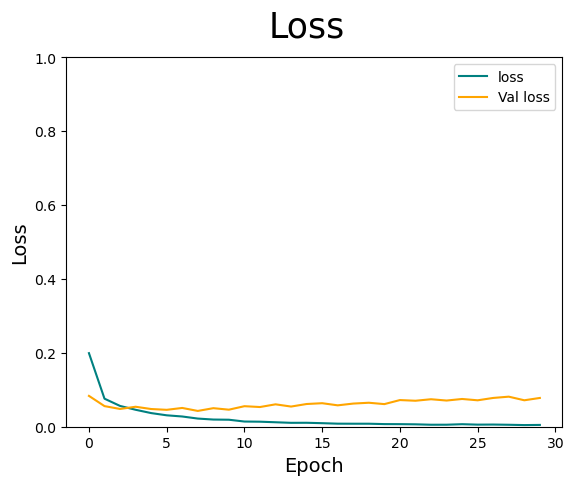

In [21]:
#Plotting the performance - Training Accuracy and Validation Accuracy
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val loss')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
fig.suptitle("Loss", fontsize=25)
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

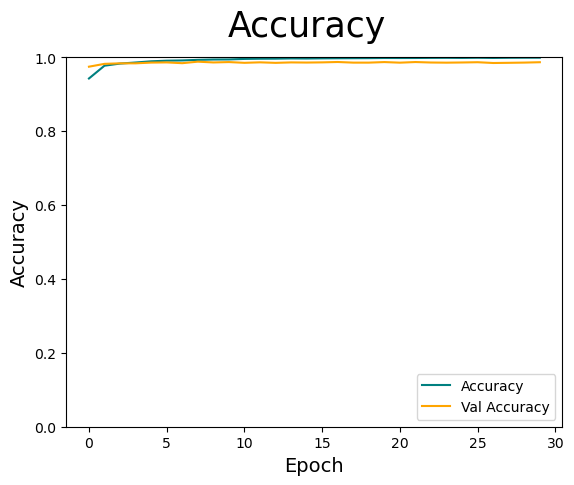

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [24]:
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)
predicted_classes

313/313 [==============================] - 2s 7ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(predicted_classes, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       1.00      0.99      0.99      1141
           2       0.99      0.98      0.98      1034
           3       0.99      0.99      0.99      1012
           4       0.99      0.99      0.99       978
           5       0.99      0.98      0.98       906
           6       0.98      0.99      0.99       952
           7       0.97      0.99      0.98      1008
           8       0.99      0.98      0.98       978
           9       0.98      0.98      0.98      1007

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [27]:
# Data OVerfitted

In [28]:
#saving model
from tensorflow.keras.models import load_model
model.save('Digit_MNIST_classifier.h5')

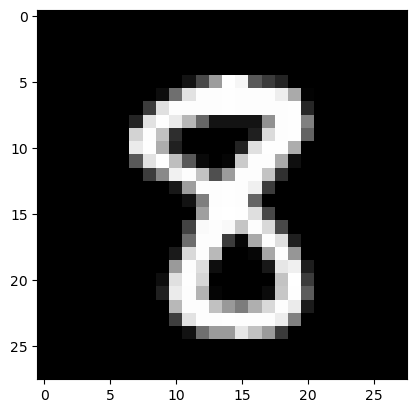

In [31]:
# Predictions
# Randomly picks any data from Tesing Datasets
import random

maxrows = X_test.shape[0]

random_row = random.randint(1, maxrows)

test_prediction = X_test[random_row]
actual_value = y_test[random_row]

plt.imshow(test_prediction.reshape(28,28), cmap='gray')

In [32]:
pred_probability = model.predict(test_prediction.reshape(-1, 28, 28, 1))
predicted_class = np.argmax(pred_probability)

print("Predicted class:", predicted_class)
print("Actual class:", actual_value)

1/1 [==============================] - 0s 179ms/step
Predicted class: 8
Actual class: 8


1/1 [==============================] - 0s 38ms/step


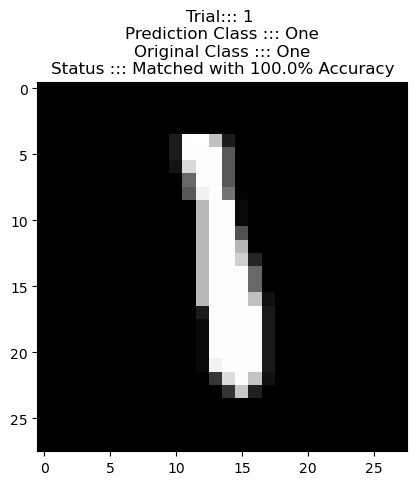

1/1 [==============================] - 0s 31ms/step


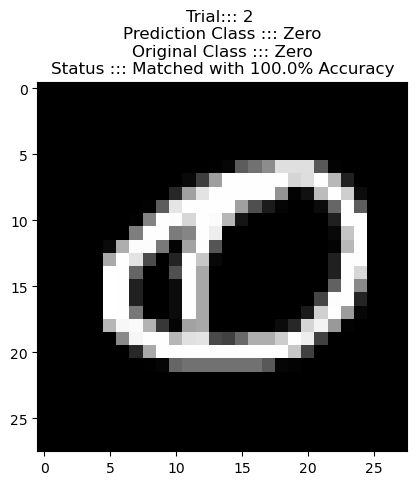

1/1 [==============================] - 0s 36ms/step


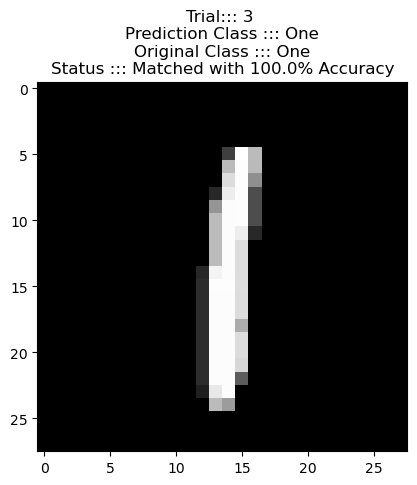

1/1 [==============================] - 0s 35ms/step


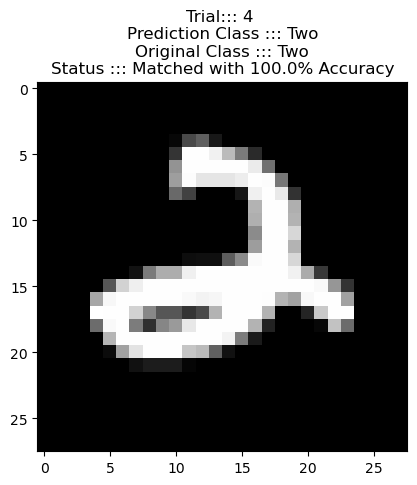

1/1 [==============================] - 0s 35ms/step


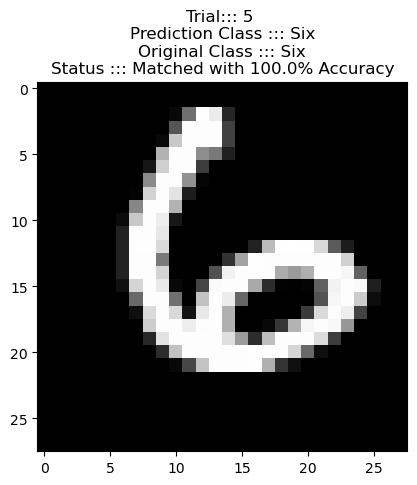

1/1 [==============================] - 0s 42ms/step


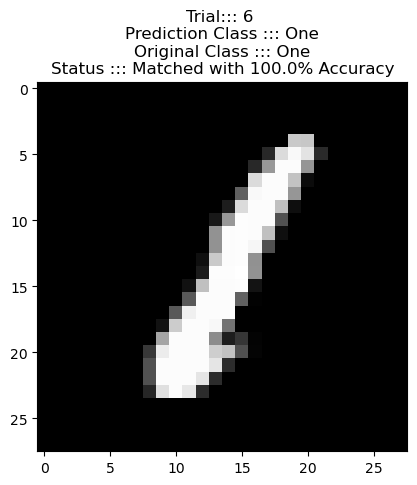

1/1 [==============================] - 0s 63ms/step


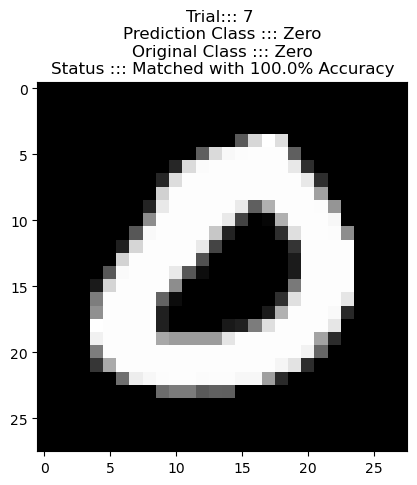

1/1 [==============================] - 0s 56ms/step


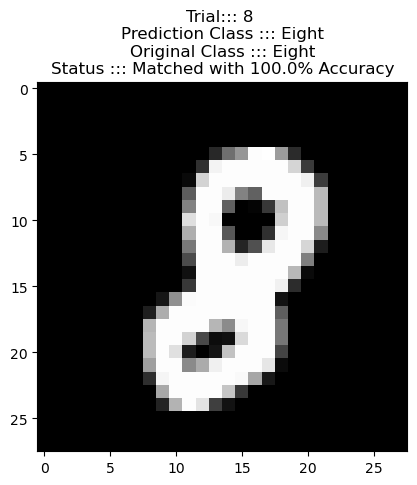

1/1 [==============================] - 0s 17ms/step


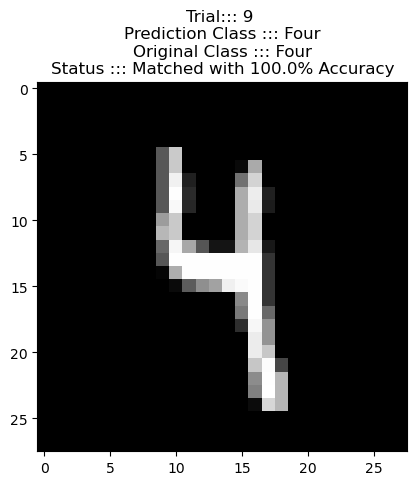

1/1 [==============================] - 0s 16ms/step


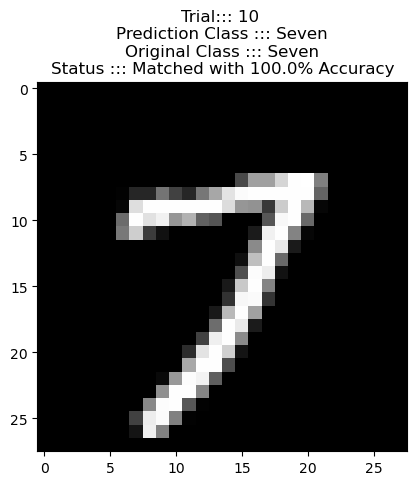

In [36]:
# Randomly Picking 10 test classes and predicting it
for i in range(1,11):
    maxrows = X_test.shape[0]

    random_row = random.randint(1, maxrows)

    test_prediction = X_test[random_row]
    actual_value = y_test[random_row]
    predictions = model.predict(test_prediction.reshape(-1, 28, 28, 1))
    predicted_class = np.argmax(predictions)
    max_probability = predictions[0, predicted_class]
    plt.imshow(test_prediction.reshape(28,28), cmap='gray')
    plt.title(f'''Trial::: {i} 
Prediction Class ::: {digitlabels[predicted_class]}
Original Class ::: {digitlabels[actual_value]}
Status ::: {'Matched' if digitlabels[predicted_class] == digitlabels[actual_value] else 'Not Matched'} with {round(max_probability*100,2)}% Accuracy''')
    plt.show()

In [37]:
# END OF DIGIT RECOGNITION

In [38]:
# Assignment Submitted by VINAY M on 18-09-2023